In [35]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import json
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import and download stopwords from NLTK.
from nltk import download
download('stopwords')  # Download stopwords list.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
import os
import sys

#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

sys.path.append('/content/gdrive/My Drive/PLP/')
print("All the system paths:")
sys.path

os.chdir('/content/drive/My Drive/PLP-Project')
print("Current working directory:")
os.getcwd()

Mounted at /content/drive
All the system paths:
Current working directory:


'/content/drive/My Drive/PLP-Project'

In [4]:
#df = pd.read_json ('dataset/df_ca.json')
#with open('/content/drive/MyDrive/PLP-Project/dataset/df_CA.json') as json_file:   

with open('dataset/df_CA.json') as json_file:     
    data = json_file.readlines()
    data = list(map(json.loads, data)) 

df = pd.DataFrame(data)

In [5]:
df.head()

,education,gPlusUserId,address,closed,gps,hours,name,phone,price,categories,gPlusPlaceId,rating,reviewText,reviewCount,userCount,jobs,loc
0,"[[[], [], [], [], [], 6], [[""The University of...",1.002152e+20,"[546 University Ave, Palo Alto, CA 94301]",False,"[37.448889, -122.158481]","[[Monday, [[""11:30 am--2:30 pm""],[""5:00--9:00 ...",Tamarine,(650) 325-8500,$,"[Restaurant, Asian Restaurant, Southeast Asian...",1.016694e+20,5,A bit expensive but lunch specials are reasona...,71,3,"[[Google, Engineer, [[],[1,1,2011],1], , ]]",California
1,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[990 Valencia St, San Francisco, CA 94110]",False,"[37.757165, -122.421287]","[[Monday, [[""7:00 am--6:00 pm""]], 1], [Tuesday...",Blue Fig,(415) 875-9622,$$$,"[Restaurant, Cafe]",1.169607e+20,4,A casual friendly spot that where nothing shor...,13,28,"[[Retailigence, Director of Business Developme...",California
2,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[452 University Ave, Palo Alto, CA 94301]",False,"[37.447589, -122.159776]","[[Monday, [[""11:00 am--10:00 pm""]], 1], [Tuesd...",Umami Burger,(650) 321-8626,None,"[Restaurant, Hamburger Restaurant, Salad Shop]",1.134952e+20,4,Delicious burgers as you'd expect from other U...,24,28,"[[Retailigence, Director of Business Developme...",California
3,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[655 Divisadero St, San Francisco, CA 94117]",False,"[37.775721, -122.438054]","[[Monday, [[""Closed""]], 1], [Tuesday, [[""5:00-...",BAR CRUDO,(415) 409-0679,$$,"[Restaurant, Bar, Seafood Restaurant]",1.141552e+20,5,What I'd normally consider foofoo based on the...,40,28,"[[Retailigence, Director of Business Developme...",California
4,"[[[], [], [], [], [], 6], [[""University of Mis...",1.019804e+20,"[620 Treat Ave, San Francisco, CA 94110]",False,"[37.760144, -122.413819]","[[Monday, [[""11:00 am--12:00 am""]], 1], [Tuesd...",Southern Pacific Brewing,(415) 341-0152,None,"[Bar, Brewery, Restaurant]",1.177716e+20,5,A large almost open air brewery that's able to...,38,28,"[[Retailigence, Director of Business Developme...",California


In [6]:
df.shape

(5236, 17)

Cleaning & Preparing Data

In [7]:
df1 =  df[['reviewText','rating']]

In [8]:
df1.head

<bound method NDFrame.head of                                              reviewText  rating
0     A bit expensive but lunch specials are reasona...       5
1     A casual friendly spot that where nothing shor...       4
2     Delicious burgers as you'd expect from other U...       4
3     What I'd normally consider foofoo based on the...       5
4     A large almost open air brewery that's able to...       5
...                                                 ...     ...
5231  Food was good, but like previous post said I o...       4
5232  Pizza is out of this world. I work at a Temecu...       5
5233  Delicious food for everyone! I love bringing m...       5
5234  Denica's is a staple for my family and many of...       4
5235  The food was just like any other McDonalds. Ju...       3

[5236 rows x 2 columns]>

In [9]:
y = df1['rating']
X = df1.drop(columns=['rating'])
X.shape

(5236, 1)

In [10]:
y.isnull().sum()

0

In [11]:
for i in range(0,len(y)):
    if (y[i]>=3):
        y[i] = "Positive"
    else:
        y[i] = "Negative"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [12]:
print(y[y=='Negative'])

20      Negative
32      Negative
45      Negative
47      Negative
52      Negative
          ...   
5176    Negative
5198    Negative
5207    Negative
5213    Negative
5226    Negative
Name: rating, Length: 534, dtype: object


In [13]:
print(y[y=='Positive'])

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
5231    Positive
5232    Positive
5233    Positive
5234    Positive
5235    Positive
Name: rating, Length: 4702, dtype: object


In [32]:
df1.head

<bound method NDFrame.head of                                              reviewText    rating
0     A bit expensive but lunch specials are reasona...  Positive
1     A casual friendly spot that where nothing shor...  Positive
2     Delicious burgers as you'd expect from other U...  Positive
3     What I'd normally consider foofoo based on the...  Positive
4     A large almost open air brewery that's able to...  Positive
...                                                 ...       ...
5231  Food was good, but like previous post said I o...  Positive
5232  Pizza is out of this world. I work at a Temecu...  Positive
5233  Delicious food for everyone! I love bringing m...  Positive
5234  Denica's is a staple for my family and many of...  Positive
5235  The food was just like any other McDonalds. Ju...  Positive

[5236 rows x 2 columns]>

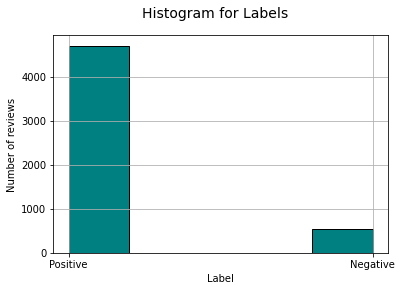

In [34]:
# plot distribution of label in training dataset
df1['rating'].hist(edgecolor = 'black',bins=5,facecolor = 'teal')
plt.suptitle("Histogram for Labels",size = 14)
plt.xlabel("Label")
plt.ylabel("Number of reviews")
plt.show()

# Applying NLP Processes

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]',' ', str(X['reviewText'][i]))
    review = review.lower() #Lowering the words is very imporatant in avoiding classifying same words as different words
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #Eleminating words that do not put much value in sentences.
    review = ' '.join(review) #Reconstructing sentences
    corpus.append(review)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=9000) #After experimenting with 7500, 5000, 2500 ...9000 worked best.
X = cv.fit_transform(corpus).toarray()

# Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Deciding Best Model

# MultinomialNB

In [17]:
from sklearn.naive_bayes import MultinomialNB
restaurant_review_model = MultinomialNB().fit(X_train, y_train)

In [37]:
y_pred = restaurant_review_model.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)

In [20]:
print(confusion_m)

[[  60   77]
 [  32 1140]]


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9167303284950343


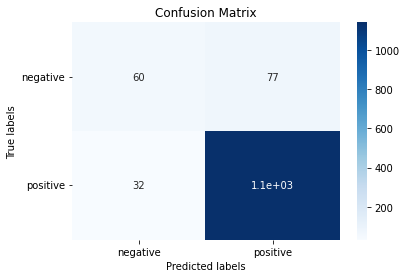

In [39]:
# Print confusion matrix for MultinomialNB
ax= plt.subplot()
sns.heatmap(confusion_m, annot=True, ax = ax,cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ "negative", "positive"]);
ax.yaxis.set_ticklabels(["negative", "positive"],rotation = 0);

In [22]:
# save the model to disk
filename = 'mnb_model.pkl'
pickle.dump(restaurant_review_model, open(filename, 'wb'))
pickle.dump(cv,open('cv-model.pkl','wb'))

In [23]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9167303284950343


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [40]:
y_pred = randomclassifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[  17  120]
 [   2 1170]]


In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9067990832696715


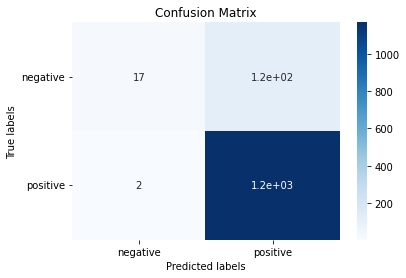

In [42]:
# Print confusion matrix for Random Forest
ax= plt.subplot()
sns.heatmap(confusion_m, annot=True, ax = ax,cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ "negative", "positive"]);
ax.yaxis.set_ticklabels(["negative", "positive"],rotation = 0);

# SVM

In [28]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

[[   6  131]
 [   1 1171]]


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8991596638655462


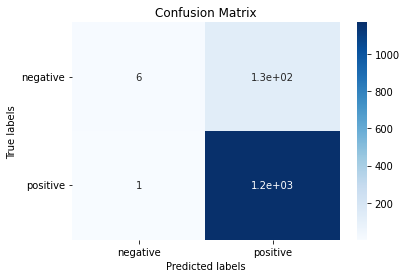

In [36]:
# Print confusion matrix for SVM
ax= plt.subplot()
sns.heatmap(confusion_m, annot=True, ax = ax,cmap='Blues'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([ "negative", "positive"]);
ax.yaxis.set_ticklabels(["negative", "positive"],rotation = 0);

# Model Accuracy Comparison:

*   MultinomialNB    0.9167
*   Random Forest   0.9070
*   SVM                      0.8991

Among 3 models, MultinomialNB is in highest accuracy